In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [93]:
def create_output_file(pred, filename):
    pred = pd.DataFrame(pred, columns=["IsGoodNews"])
    pred.to_excel(filename, index=False)
    print("File: {} is created".format(filename))

In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [4]:
train_df.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.707520,1.065873,0.953319,-0.132948,-0.291683,0.764765,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,1.312337,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,3.675591,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,15.211013,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,-0.320591,2.030243,-0.307555,1.287387,-0.189867,0.289792,-0.321557,-0.362461,0.128969,-0.191111,3.977893,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,0.101269,-0.228932,0.644464,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [5]:
test_df.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters
0,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,0.801719,-0.307555,-0.184379,-0.189867,1.367757,-0.321557,2.168698,-0.973161,-0.191111,2.736594,-0.132948,-0.291683,2.485239,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,1.284346,-0.079531,-0.118688,-0.151911,-0.453742,-0.002540,-0.007263,-0.283052
1,-0.351864,-0.318036,-0.561952,-0.039223,0.007071,-0.353977,-0.304257,-0.240708,-0.318797,0.570271,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.600132,-0.191111,-0.419104,-0.132948,-0.291683,-0.197881,3.951345,2.705426,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,0.479145,-0.152367,-0.236402,-0.244919,2.640600,-0.055522,-0.181398,-0.187171,8.109520,0.212177,-0.208657,0.291256,-0.323019,-0.205212,-0.079531,-0.118688,1.070723,1.147411,-0.054961,-0.148423,0.049739
2,0.006107,-0.318036,-0.351725,-0.039223,-0.307783,0.027319,-0.304257,-0.240708,3.430188,-0.352968,-0.320591,-0.262270,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.718823,-0.191111,-0.515261,-0.132948,-0.291683,-0.197881,-0.010906,0.475015,-0.149569,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,0.499211,-0.152367,-0.236402,-0.244919,0.165622,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.121342,0.068771,-0.054961,-0.062158,0.322149
3,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,2.089042,-0.240708,-0.318797,-0.352968,-0.320591,0.505557,-0.307555,-0.184379,-0.189867,-0.333610,1.918833,-0.362461,1.095453,-0.191111,1.119408,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.065290,0.304055,-0.054961,0.008422,-0.204418
4,0.624420,0.609973,-0.561952,-0.039223,0.393482,0.685920,-0.304257,1.134053,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,0.005978,0.042589,-0.213736,-0.228932,0.284707,-0.233062,0.543940,-0.150852,-0.183048,-0.152367,0.437249,0.489245,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,1.087114,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.191555,-0.313944


In [6]:
test_df_temp = test_df.copy()
test_df_temp["IsGoodNews"] = np.nan
test_df_temp.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,0.801719,-0.307555,-0.184379,-0.189867,1.367757,-0.321557,2.168698,-0.973161,-0.191111,2.736594,-0.132948,-0.291683,2.485239,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,1.284346,-0.079531,-0.118688,-0.151911,-0.453742,-0.002540,-0.007263,-0.283052,NaN
1,-0.351864,-0.318036,-0.561952,-0.039223,0.007071,-0.353977,-0.304257,-0.240708,-0.318797,0.570271,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.600132,-0.191111,-0.419104,-0.132948,-0.291683,-0.197881,3.951345,2.705426,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,0.479145,-0.152367,-0.236402,-0.244919,2.640600,-0.055522,-0.181398,-0.187171,8.109520,0.212177,-0.208657,0.291256,-0.323019,-0.205212,-0.079531,-0.118688,1.070723,1.147411,-0.054961,-0.148423,0.049739,NaN
2,0.006107,-0.318036,-0.351725,-0.039223,-0.307783,0.027319,-0.304257,-0.240708,3.430188,-0.352968,-0.320591,-0.262270,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.718823,-0.191111,-0.515261,-0.132948,-0.291683,-0.197881,-0.010906,0.475015,-0.149569,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,0.499211,-0.152367,-0.236402,-0.244919,0.165622,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.121342,0.068771,-0.054961,-0.062158,0.322149,NaN
3,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,2.089042,-0.240708,-0.318797,-0.352968,-0.320591,0.505557,-0.307555,-0.184379,-0.189867,-0.333610,1.918833,-0.362461,1.095453,-0.191111,1.119408,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.065290,0.304055,-0.054961,0.008422,-0.204418,NaN
4,0.624420,0.609973,-0.561952,-0.039223,0.393482,0.685920,-0.304257,1.134053,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,0.005978,0.042589,-0.213736,-0.228932,0.284707,-0.233062,0.543940,-0.150852,-0.183048,-0.152367,0.437249,0.489245,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,1.087114,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.191555,-0.313944,NaN


In [7]:
df = pd.concat([train_df, test_df_temp], axis=0)
df.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.707520,1.065873,0.953319,-0.132948,-0.291683,0.764765,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,1.312337,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1.0
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,3.675591,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,15.211013,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0.0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0.0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,-0.320591,2.030243,-0.307555,1.287387,-0.189867,0.289792,-0.321557,-0.362461,0.128969,-0.191111,3.977893,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1.0
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,0.101269,-0.228932,0.644464,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0.0


In [8]:
df.isna().sum()

Freq_Of_Word_1              0
Freq_Of_Word_2              0
Freq_Of_Word_3              0
Freq_Of_Word_4              0
Freq_Of_Word_5              0
Freq_Of_Word_6              0
Freq_Of_Word_7              0
Freq_Of_Word_8              0
Freq_Of_Word_9              0
Freq_Of_Word_10             0
Freq_Of_Word_11             0
Freq_Of_Word_12             0
Freq_Of_Word_13             0
Freq_Of_Word_14             0
Freq_Of_Word_15             0
Freq_Of_Word_16             0
Freq_Of_Word_17             0
Freq_Of_Word_18             0
Freq_Of_Word_19             0
Freq_Of_Word_20             0
Freq_Of_Word_21             0
Freq_Of_Word_22             0
Freq_Of_Word_23             0
Freq_Of_Word_24             0
Freq_Of_Word_25             0
Freq_Of_Word_26             0
Freq_Of_Word_27             0
Freq_Of_Word_28             0
Freq_Of_Word_29             0
Freq_Of_Word_30             0
Freq_Of_Word_31             0
Freq_Of_Word_32             0
Freq_Of_Word_33             0
Freq_Of_Wo

In [9]:
print(len(train_df), len(test_df))

947 527


In [10]:
train_df.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,0.027260,-0.018509,-0.017778,0.039708,-0.024780,-0.016547,0.015771,0.002899,-0.009023,0.026035,-0.003728,0.012839,-0.041618,-0.047414,-0.043273,0.021235,0.027867,0.017251,-0.010705,-0.014522,-0.030863,-0.005286,-0.003128,-0.007025,-0.004619,-0.017331,-0.005015,0.006574,0.028426,-0.000311,0.029366,-0.034475,-0.011441,0.017819,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,1.102226,0.958783,0.794336,1.164453,0.886515,0.813463,1.075503,1.042382,1.012172,1.050691,1.009282,1.035742,0.894288,0.477595,0.883399,1.076350,1.065251,1.105143,0.862914,0.924056,0.690955,0.917108,1.088130,0.915835,1.002324,0.860243,0.961354,0.968636,1.266652,0.968864,1.133304,0.802059,1.016758,1.215326,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.481649,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.210148,-0.191111,-0.454070,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.12040

In [78]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, [-1]]

In [79]:
print("Independent variables: ", X.columns)
print("Dependent variables: ", y.columns)

Independent variables:  Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
base_lr = LogisticRegression()
base_lr.fit(X_train, y_train)
y_pred = base_lr.predict_proba(X_test)[::,1]


C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
y_pred

array([2.91417914e-04, 3.49850522e-04, 1.86314501e-06, 8.35222098e-01,
       5.66104766e-03, 1.76788712e-01, 8.10020958e-06, 9.45665582e-05,
       4.53240491e-02, 9.98712378e-01, 2.95059929e-02, 9.83955134e-01,
       2.08627310e-09, 9.89312424e-01, 9.99990383e-01, 6.81141775e-01,
       9.99998858e-01, 9.64006928e-01, 6.66904364e-01, 8.57832017e-01,
       9.18857213e-03, 2.71912172e-01, 5.05577805e-01, 9.99770003e-01,
       1.25254916e-01, 3.07498995e-01, 1.19625023e-01, 7.23894130e-02,
       3.40816909e-01, 9.94424475e-01, 9.51954163e-01, 9.54724322e-08,
       5.44148665e-01, 6.41717396e-01, 2.11685985e-01, 7.62162531e-01,
       7.31532893e-01, 3.00792085e-05, 6.41609676e-02, 9.63739909e-01,
       7.75399148e-01, 9.99999876e-01, 3.77412718e-04, 9.32893156e-01,
       4.33476780e-06, 9.49052011e-01, 1.26254489e-01, 9.30970961e-01,
       9.93631953e-01, 5.67006260e-01, 1.94361546e-05, 3.05761310e-02,
       1.55352791e-01, 9.99962578e-01, 5.85564825e-01, 3.25046470e-01,
      

In [17]:
new_pred = []
threshold = 0.5
for val in y_pred:
    if val > threshold:
        new_pred.append(1)
    else:
        new_pred.append(0)
confusion_matrix(y_test, new_pred)
f1_score(y_test, new_pred)

0.9156626506024096

In [18]:
test_df_pred = base_lr.predict(test_df)
test_df_pred = pd.DataFrame(test_df_pred, columns=["IsGoodNews"])
test_df_pred.to_excel("MessagePolarityPred_LogReg_v0_1.xlsx", index=False)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameter = {'C': [0.01, 0.1, 1],
             'max_iter': [100, 200, 500]}

cv = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=parameter)
cv.fit(X_train, y_train)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(f1_score(y_test,rf_pred))

C:\Users\Snehal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[50  2]
 [ 3 40]]
0.9411764705882352


In [25]:
test_df_pred = rf.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_RandomForest_v0_1.xlsx")

File: MessageProlarityPred_RandomForest_v0_1.xlsx is created


In [26]:
parameter = {'n_estimators': [100,150, 200],
          'min_samples_split': [2, 3],
          'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
            'max_depth': [10, 20, 30, 50, None]}

cv = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=parameter)
cv.fit(X_train, y_train)
cv.best_estimator_

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
rf_1 = RandomForestClassifier(n_estimators=200)
rf_1.fit(X_train, y_train)
rf_pred = rf_1.predict(X_test)
print(f1_score(y_test, rf_pred))

C:\Users\Snehal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9411764705882352


In [28]:
test_df_pred = rf_1.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_RF_v0_3.xlsx")

File: MessageProlarityPred_RF_v0_3.xlsx is created


In [146]:
import xgboost as xgb

In [37]:
xgb_1 = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_1.fit(X_train, y_train)
xgb_pred = xgb_1.predict(X_test)
f1_score(y_test, xgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9655172413793104

In [38]:
xgb_1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [36]:
test_df_pred = xgb_1.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_XGB_v0_2.xlsx")

File: MessageProlarityPred_XGB_v0_2.xlsx is created


In [39]:
params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.5], 'n_estimators': [200], 
          'booster': ['gbtree', 'gblinear', 'dart'], 'reg_lambda': [0.5, 1]}

cv = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=params)
cv.fit(X_train, y_train)
cv.best_estimator_

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
xgb_3 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_3.fit(X, y)
xgb_pred = xgb_3.predict(X_test)
f1_score(y_test, xgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [46]:
test_df_pred = xgb_3.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_XGB_v0_4.xlsx")

File: MessageProlarityPred_XGB_v0_4.xlsx is created


In [69]:
import lightgbm as lgb

In [56]:
lgb_1 = lgb.LGBMClassifier()
lgb_1.fit(X, y)
lgb_pred = lgb_1.predict(X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [51]:
test_df_pred = lgb_1.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_2.xlsx")

File: MessageProlarityPred_LGB_v0_2.xlsx is created


In [52]:
lgb_1.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [61]:
params = {'boosting_type': ['gbdt', 'goss', 'rf'], 'learning_rate': [0.1, 0.2, 0.3], 'min_child_samples': [10, 20],
         'n_estimators': [100, 200], 'reg_lambda': [0, 0.5, 1], 'importance_type': ['split', 'gain']}

cv = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_grid=params)
cv.fit(X_train, y_train)
cv.best_estimator_

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at c:\users\vssadministrator\appdata\local\temp\pip-req-build-n1pn0za2\compile\src\boosting\rf.hpp, lin

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
lgb_3 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_3.fit(X, y)
lgb_pred = lgb_3.predict(X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [69]:
test_df_pred = lgb_3.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_4.xlsx")

File: MessageProlarityPred_LGB_v0_4.xlsx is created


In [64]:
params = {'boosting_type': ['gbdt', 'goss', 'rf'], 'learning_rate': [0.1, 0.2, 0.25], 'min_child_samples': [10, 20],
         'n_estimators': [100, 200], 'reg_lambda': [0, 0.5, 1], 'reg_alpha': [0, 0.5, 1],'importance_type': ['split', 'gain']}

cv = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_grid=params, scoring='accuracy')
cv.fit(X_train, y_train)
cv.best_estimator_

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at c:\users\vssadministrator\appdata\local\temp\pip-req-build-n1pn0za2\compile\src\boosting\rf.hpp, lin

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.5, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [82]:
lgb_5 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.5, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_5.fit(X_train, y_train)
lgb_pred = lgb_5.predict(X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9655172413793104

In [67]:
test_df_pred = lgb_5.predict(test_df)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_5.xlsx")

File: MessageProlarityPred_LGB_v0_5.xlsx is created


In [85]:
new_X = df_1.iloc[:, :-1]
new_y = df_1.iloc[:, [-1]]
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=42)

In [89]:
# Training model after removing correlation

lgb_6 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.5, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_6.fit(new_X, new_y)
lgb_pred = lgb_6.predict(new_X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [94]:
test_df_pred = lgb_6.predict(test_df_1)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_6.xlsx")

File: MessageProlarityPred_LGB_v0_6.xlsx is created


In [98]:
lgb_7 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_7.fit(new_X, new_y)
lgb_pred = lgb_7.predict(new_X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [99]:
test_df_pred = lgb_7.predict(test_df_1)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_7.xlsx")

File: MessageProlarityPred_LGB_v0_7.xlsx is created


In [140]:
new_X = df_2.iloc[:, :-1]
new_y = df_2.iloc[:, [-1]]
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=42)

In [142]:
lgb_8 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_8.fit(new_X, new_y)
lgb_pred = lgb_8.predict(new_X_test)
f1_score(y_test, lgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5333333333333334

In [145]:
test_df_pred = lgb_8.predict(test_df_1)
create_output_file(test_df_pred, "MessageProlarityPred_LGB_v0_8.xlsx")

File: MessageProlarityPred_LGB_v0_8.xlsx is created


In [149]:
xgb_5 = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_5.fit(new_X, new_y)
xgb_pred = xgb_5.predict(new_X_test)
f1_score(y_test, xgb_pred)

C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Snehal\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5405405405405406

In [150]:
test_df_pred = xgb_5.predict(test_df_1)
create_output_file(test_df_pred, "MessageProlarityPred_XGB_v0_5.xlsx")

File: MessageProlarityPred_XGB_v0_5.xlsx is created


# Exploratory Data Analysis

In [15]:
train_df.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,0.027260,-0.018509,-0.017778,0.039708,-0.024780,-0.016547,0.015771,0.002899,-0.009023,0.026035,-0.003728,0.012839,-0.041618,-0.047414,-0.043273,0.021235,0.027867,0.017251,-0.010705,-0.014522,-0.030863,-0.005286,-0.003128,-0.007025,-0.004619,-0.017331,-0.005015,0.006574,0.028426,-0.000311,0.029366,-0.034475,-0.011441,0.017819,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,1.102226,0.958783,0.794336,1.164453,0.886515,0.813463,1.075503,1.042382,1.012172,1.050691,1.009282,1.035742,0.894288,0.477595,0.883399,1.076350,1.065251,1.105143,0.862914,0.924056,0.690955,0.917108,1.088130,0.915835,1.002324,0.860243,0.961354,0.968636,1.266652,0.968864,1.133304,0.802059,1.016758,1.215326,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.481649,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.210148,-0.191111,-0.454070,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.12040

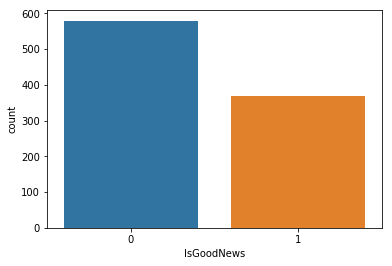

In [16]:
sns.countplot(train_df["IsGoodNews"])

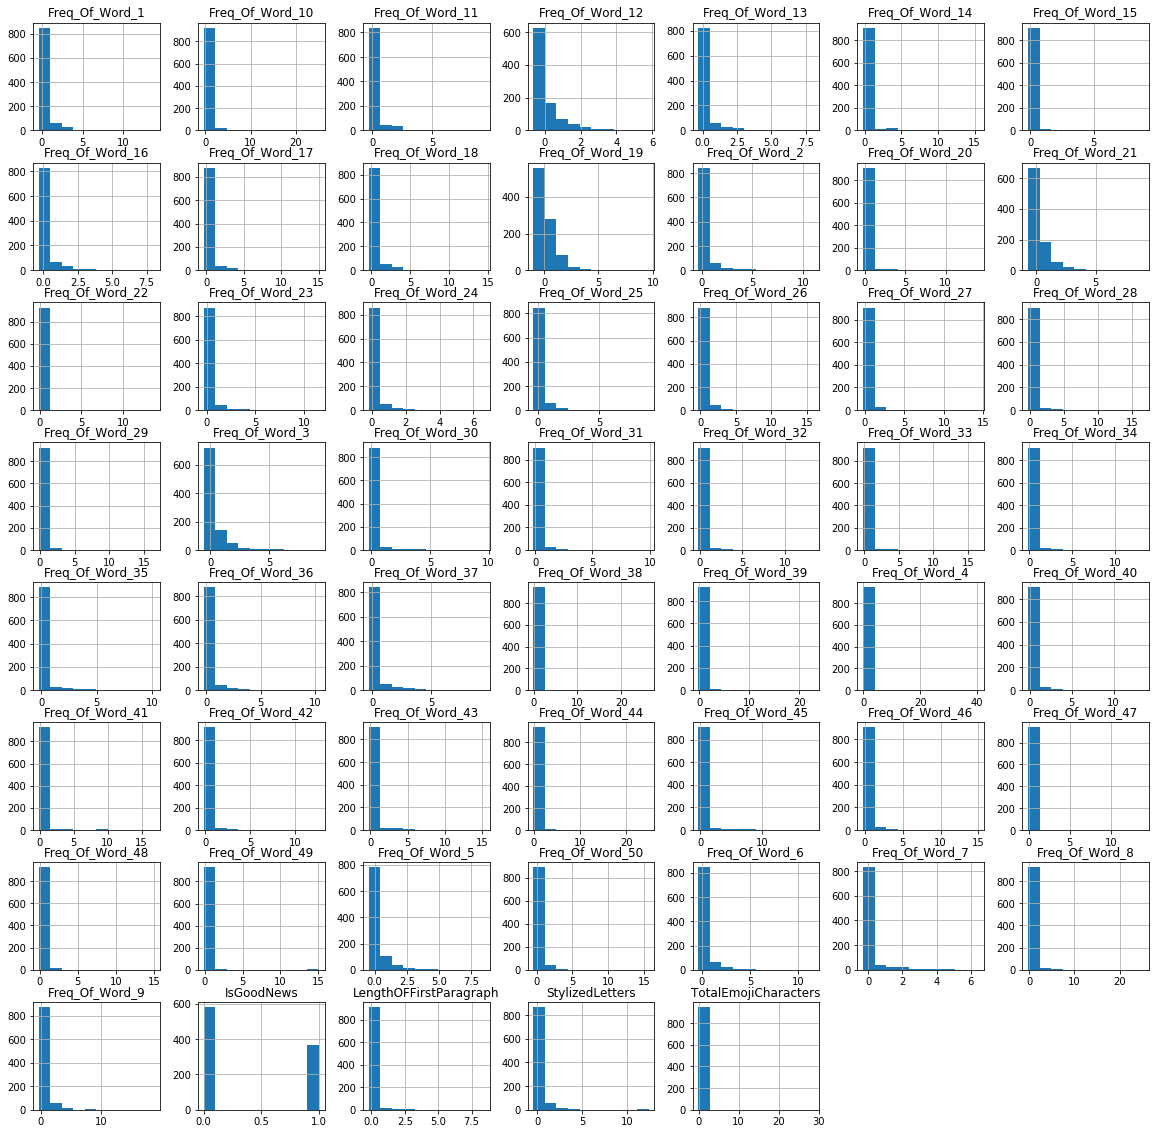

In [17]:
ax = train_df.hist(figsize=(20,20))

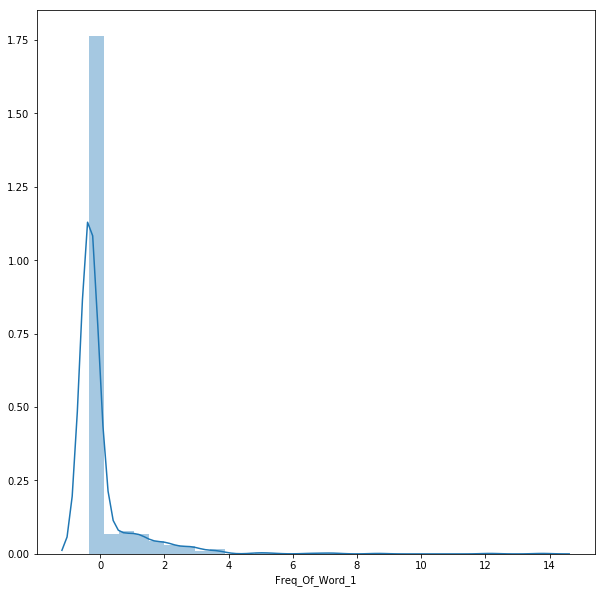

In [21]:
plt.figure(figsize=(10, 10))
sns.distplot(train_df["Freq_Of_Word_1"])

In [20]:
train_df.loc[train_df["Freq_Of_Word_1"] > -0.351864, :]

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,-0.320591,2.030243,-0.307555,1.287387,-0.189867,0.289792,-0.321557,-0.362461,0.128969,-0.191111,3.977893,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
15,12.144571,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,1.197188,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,4.161128,-0.079531,-0.118688,-0.151911,1.517143,-0.107383,-0.219003,-0.420661,0
18,1.177647,0.640907,0.336291,-0.039223,-0.365029,0.096645,-0.189194,0.355022,1.282711,0.710155,1.199064,0.428774,1.316222,3.679005,-0.189867,0.004066,0.626300,-0.362461,0.846767,-0.191111,0.577432,-0.132948,2.724673,0.498501,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.304250,-0.205212,-0.079531,-0.118688,-0.151911,-0.245959,0.023670,0.533850,3.843829,1
19,2.837330,0.176902,0.221621,-0.039223,-0.236225,0.477941,-0.304257,0.125895,-0.318797,0.332467,0.146995,-0.009984,2.256303,-0.184379,0.468567,-0.333610,-0.321557,0.255837,0.366351,-0.191111,0.367635,-0.132948,1.051966,2.137048,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.160401,-0.028751,0.106449,0.555243,1
23,1.210190,0.300637,0.489183,-0.039223,-0.078798,0.339288,-0.304257,0.377934,0.663946,1.003913,2.075788,0.505557,0.062780,-0.184379,-0.189867,1.108006,1.164855,-0.246530,0.366351,-0.191111,0.201546,-0.132948,-0.127155,1.215365,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,0.002493,-0.133876,-0.168998,-0.208657,-0.120401,-0.201020,-0.205212,-0.079531,-0.118688,-0.151911,-0.132901,-0.054961,0.145660,0.927350,1
24,0.689505,0.176902,0.508295,-0.039223,-0.007241,0.477941,-0.212207,2.417164,1.137119,0.206571,0.380788,0.110674,1.173786,1.042093,0.962392,0.497592,0.453962,0.410412,0.756336,0.236798,0.411343,-0.132948,0.695488,1.031029,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.060728,-0.133876,-0.168998,-0.208657,-0.120401,-0.210405,-0.205212,-0.079531,-0.118688,-0.085350,-0.294849,-0.054961,0.486796,1.677182,1
31,1.242733,-0.318036,

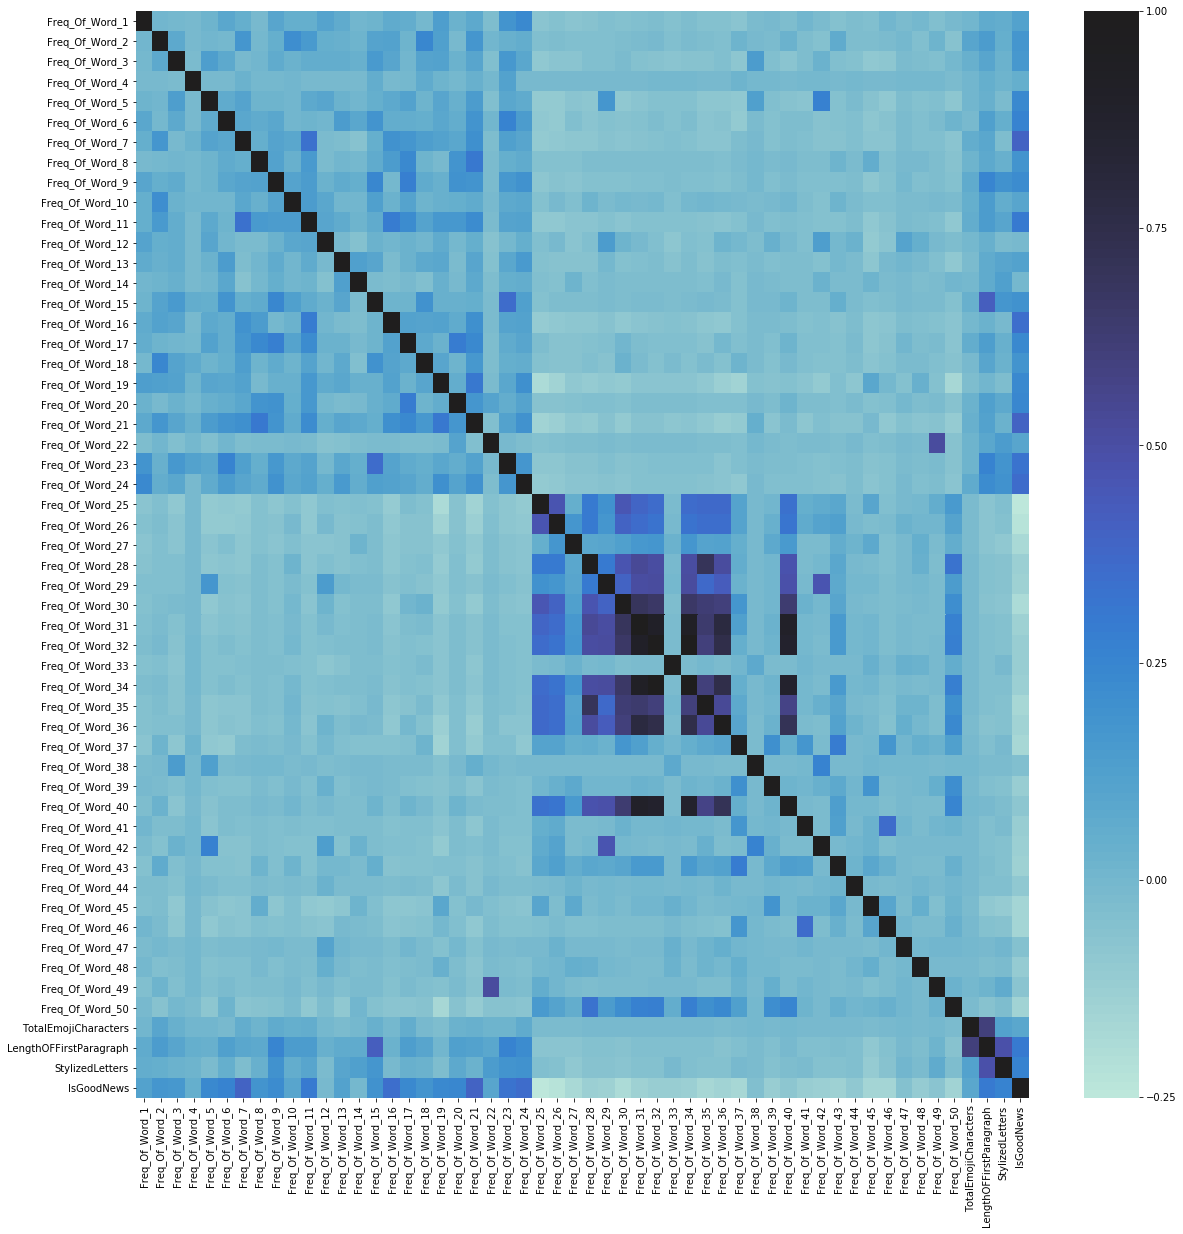

In [39]:
corr = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=1)

In [100]:
train_df.loc[:, ["Freq_Of_Word_27", "Freq_Of_Word_30", "Freq_Of_Word_31", "Freq_Of_Word_32", "Freq_Of_Word_33", "Freq_Of_Word_34",
                 "Freq_Of_Word_35","Freq_Of_Word_39", "Freq_Of_Word_40"]].corr()

,Freq_Of_Word_27,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_39,Freq_Of_Word_40
Freq_Of_Word_27,1.000000,0.121080,0.166096,0.172935,0.028171,0.173263,0.106479,0.072737,0.153996
Freq_Of_Word_30,0.121080,1.000000,0.687385,0.667034,-0.031588,0.667570,0.619296,0.004827,0.630071
Freq_Of_Word_31,0.166096,0.687385,1.000000,0.911724,-0.023166,0.912434,0.639944,0.027026,0.900947
Freq_Of_Word_32,0.172935,0.667034,0.911724,1.000000,-0.020704,0.998082,0.605871,0.021881,0.874266
Freq_Of_Word_33,0.028171,-0.031588,-0.023166,-0.020704,1.000000,-0.020696,0.002066,-0.018560,-0.022081
Freq_Of_Word_34,0.173263,0.667570,0.912434,0.998082,-0.020696,1.000000,0.607713,0.021937,0.874950
Freq_Of_Word_35,0.106479,0.619296,0.639944,0.605871,0.002066,0.607713,1.000000,0.007900,0.571607
Freq_Of_Word_39,0.072737,0.004827,0.027026,0.021881,-0.018560,0.021937,0.007900,1.000000,0.013385
Freq_Of_Word_40,0.153996,0.630071,0.900947,0.874266,-0.022081,0.874950,0.571607,0.013385,1.000000


,Freq_Of_Word_25,Freq_Of_Word_19,Freq_Of_Word_18
Freq_Of_Word_25,1.000000,-0.188861,-0.049811
Freq_Of_Word_19,-0.188861,1.000000,0.091533
Freq_Of_Word_18,-0.049811,0.091533,1.000000


# Removing Highly correlated features

In [61]:
df_1 = train_df.copy()

In [62]:
df_1 = df_1.drop(columns = ["Freq_Of_Word_31", "Freq_Of_Word_32", "Freq_Of_Word_34"])
df_1.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_33,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.707520,1.065873,0.953319,-0.132948,-0.291683,0.764765,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,3.675591,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,15.211013,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,-0.320591,2.030243,-0.307555,1.287387,-0.189867,0.289792,-0.321557,-0.362461,0.128969,-0.191111,3.977893,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,0.101269,-0.228932,0.644464,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [101]:
df_1.loc[:, ["Freq_Of_Word_27", "Freq_Of_Word_28", "Freq_Of_Word_30", "Freq_Of_Word_33", "Freq_Of_Word_35", "Freq_Of_Word_36",
                 "Freq_Of_Word_39", "Freq_Of_Word_40"]].corr()

,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_30,Freq_Of_Word_33,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_39,Freq_Of_Word_40
Freq_Of_Word_27,1.000000,0.083555,0.121080,0.028171,0.106479,0.119796,0.072737,0.153996
Freq_Of_Word_28,0.083555,1.000000,0.464715,-0.008117,0.701798,0.515596,0.012534,0.473445
Freq_Of_Word_30,0.121080,0.464715,1.000000,-0.031588,0.619296,0.599612,0.004827,0.630071
Freq_Of_Word_33,0.028171,-0.008117,-0.031588,1.000000,0.002066,-0.021663,-0.018560,-0.022081
Freq_Of_Word_35,0.106479,0.701798,0.619296,0.002066,1.000000,0.536260,0.007900,0.571607
Freq_Of_Word_36,0.119796,0.515596,0.599612,-0.021663,0.536260,1.000000,0.027089,0.713581
Freq_Of_Word_39,0.072737,0.012534,0.004827,-0.018560,0.007900,0.027089,1.000000,0.013385
Freq_Of_Word_40,0.153996,0.473445,0.630071,-0.022081,0.571607,0.713581,0.013385,1.000000


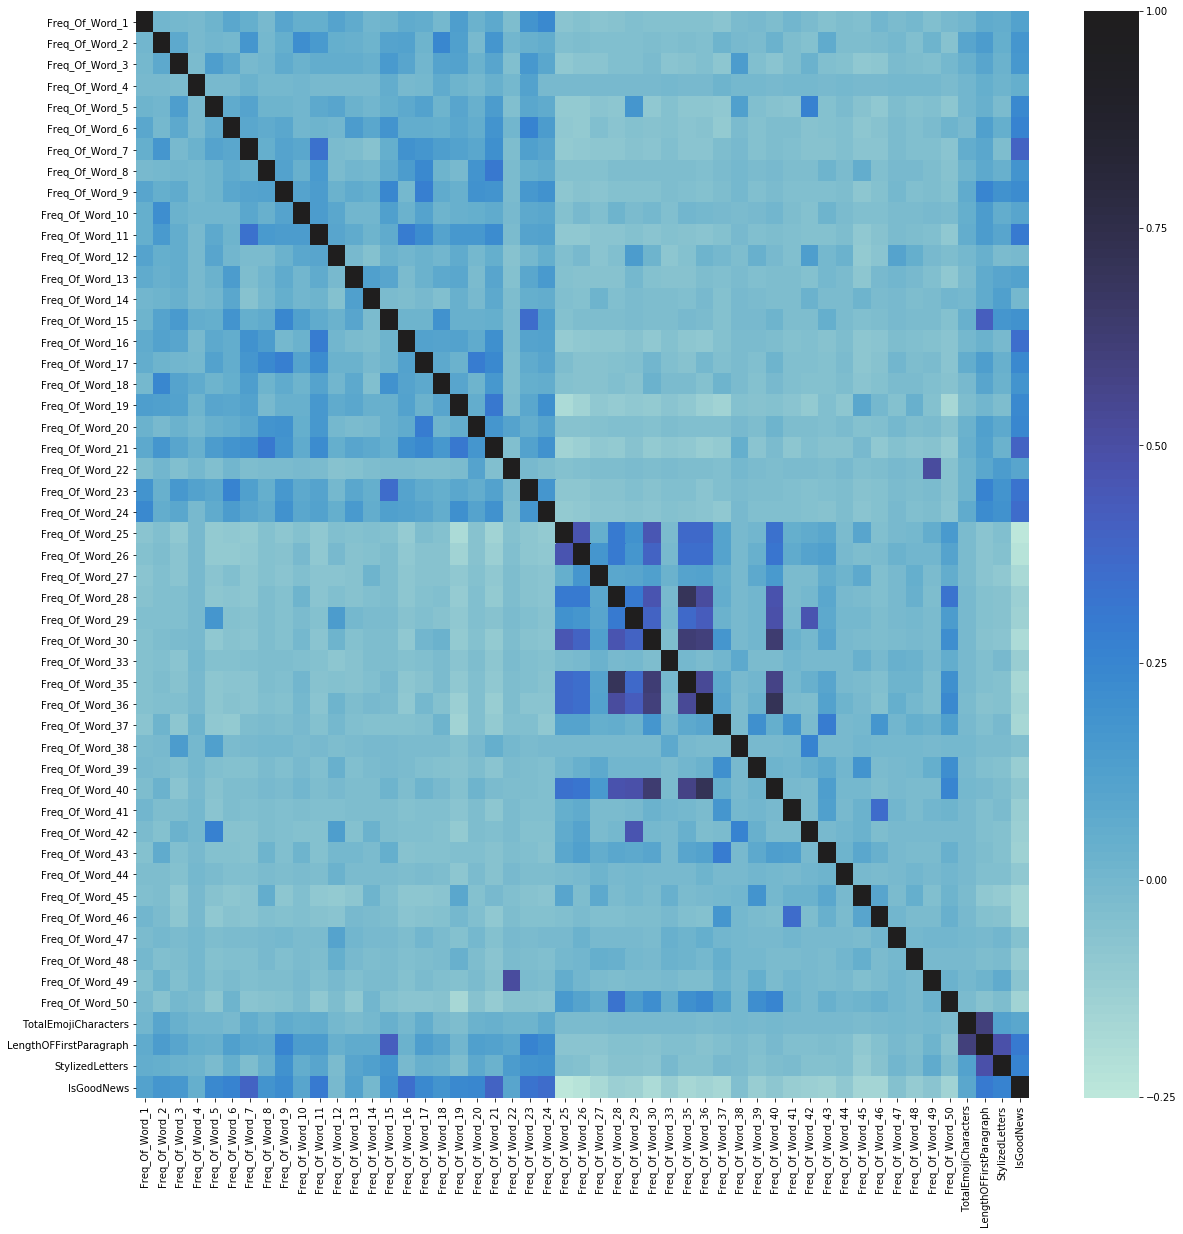

In [66]:
df_1_corr = df_1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_1_corr, center=1)

In [91]:
test_df_1 = test_df.drop(columns = ["Freq_Of_Word_31", "Freq_Of_Word_32", "Freq_Of_Word_34"])
test_df_1.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_33,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters
0,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,0.801719,-0.307555,-0.184379,-0.189867,1.367757,-0.321557,2.168698,-0.973161,-0.191111,2.736594,-0.132948,-0.291683,2.485239,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,1.284346,-0.079531,-0.118688,-0.151911,-0.453742,-0.002540,-0.007263,-0.283052
1,-0.351864,-0.318036,-0.561952,-0.039223,0.007071,-0.353977,-0.304257,-0.240708,-0.318797,0.570271,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.600132,-0.191111,-0.419104,-0.132948,-0.291683,-0.197881,3.951345,2.705426,-0.213736,-0.228932,-0.164988,-0.233062,0.479145,-0.236402,-0.244919,2.640600,-0.055522,-0.181398,-0.187171,8.109520,0.212177,-0.208657,0.291256,-0.323019,-0.205212,-0.079531,-0.118688,1.070723,1.147411,-0.054961,-0.148423,0.049739
2,0.006107,-0.318036,-0.351725,-0.039223,-0.307783,0.027319,-0.304257,-0.240708,3.430188,-0.352968,-0.320591,-0.262270,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.718823,-0.191111,-0.515261,-0.132948,-0.291683,-0.197881,-0.010906,0.475015,-0.149569,-0.228932,-0.164988,-0.233062,0.499211,-0.236402,-0.244919,0.165622,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.121342,0.068771,-0.054961,-0.062158,0.322149
3,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,2.089042,-0.240708,-0.318797,-0.352968,-0.320591,0.505557,-0.307555,-0.184379,-0.189867,-0.333610,1.918833,-0.362461,1.095453,-0.191111,1.119408,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.065290,0.304055,-0.054961,0.008422,-0.204418
4,0.624420,0.609973,-0.561952,-0.039223,0.393482,0.685920,-0.304257,1.134053,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,0.005978,0.042589,-0.213736,-0.228932,0.284707,-0.233062,-0.183048,0.437249,0.489245,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,1.087114,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.191555,-0.313944


# Dealing with Outliers

In [102]:
train_df.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,0.027260,-0.018509,-0.017778,0.039708,-0.024780,-0.016547,0.015771,0.002899,-0.009023,0.026035,-0.003728,0.012839,-0.041618,-0.047414,-0.043273,0.021235,0.027867,0.017251,-0.010705,-0.014522,-0.030863,-0.005286,-0.003128,-0.007025,-0.004619,-0.017331,-0.005015,0.006574,0.028426,-0.000311,0.029366,-0.034475,-0.011441,0.017819,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,1.102226,0.958783,0.794336,1.164453,0.886515,0.813463,1.075503,1.042382,1.012172,1.050691,1.009282,1.035742,0.894288,0.477595,0.883399,1.076350,1.065251,1.105143,0.862914,0.924056,0.690955,0.917108,1.088130,0.915835,1.002324,0.860243,0.961354,0.968636,1.266652,0.968864,1.133304,0.802059,1.016758,1.215326,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.481649,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.210148,-0.191111,-0.454070,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.12040

In [133]:
# train_df.loc[train_df["Freq_Of_Word_4"] > 40, ]
# train_df.loc[train_df["TotalEmojiCharacters"] > 28, ]
# train_df.loc[train_df["Freq_Of_Word_38"] > 26, ]
# train_df.loc[train_df["Freq_Of_Word_10"] > 25, ]
train_df.loc[train_df["Freq_Of_Word_8"] > 25, ]

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
571,-0.351864,-0.318036,-0.561952,-0.039223,-0.46521,-0.353977,-0.304257,25.215295,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.33361,-0.321557,-0.362461,-0.973161,-0.191111,9.004282,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,4.885384,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.42347,1


In [134]:
df_2 = df_1.copy()
df_2.drop(train_df.loc[train_df["Freq_Of_Word_4"] > 40, ["Freq_Of_Word_4"]].index, axis=0, inplace=True)
df_2.drop(train_df.loc[train_df["TotalEmojiCharacters"] > 28, ["TotalEmojiCharacters"]].index, axis=0, inplace=True)
df_2.drop(train_df.loc[train_df["Freq_Of_Word_38"] > 26, ["Freq_Of_Word_38"]].index, axis=0, inplace=True)
df_2.drop(train_df.loc[train_df["Freq_Of_Word_10"] > 25, ["Freq_Of_Word_10"]].index, axis=0, inplace=True)
df_2.drop(train_df.loc[train_df["Freq_Of_Word_8"] > 25, ["Freq_Of_Word_8"]].index, axis=0, inplace=True)

In [135]:
# df_2.loc[train_df["Freq_Of_Word_4"] > 40, ]
# df_2.loc[train_df["TotalEmojiCharacters"] > 28, ]
# df_2.loc[train_df["Freq_Of_Word_38"] > 26, ]
# df_2.loc[train_df["Freq_Of_Word_10"] > 25, ]
df_2.loc[train_df["Freq_Of_Word_8"] > 25, ]

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_33,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews


In [136]:
print(len(train_df), len(df_2))

947 942


In [137]:
df_2.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_33,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,0.024624,0.038292,0.015837,-0.029659,-0.020945,0.004725,-0.005852,-0.017273,0.045916,-0.020526,0.029106,-0.016191,-0.016240,0.040898,-0.025739,-0.015140,0.017561,0.002213,-0.005820,0.027188,-0.015453,0.013612,-0.044017,-0.047485,-0.041742,0.022934,0.029150,0.018558,-0.009886,-0.013362,-0.002173,-0.003389,-0.016123,-0.004297,-0.021097,0.029540,0.000681,0.030232,-0.041670,-0.010394,0.018553,0.055828,-0.004862,-0.031747,-0.000774,0.034654,0.015771,-0.044110,-0.030531,0.017237,0.387473
std,1.107303,1.086003,1.012648,0.282815,0.881776,0.973050,0.870492,0.789159,1.182524,0.782474,1.104858,0.960663,0.796162,1.167428,0.887339,0.815356,1.078074,1.042614,1.012735,1.053360,0.964732,1.038435,0.890189,0.478265,0.885492,1.078952,1.067931,1.107929,0.865130,0.926370,1.090938,1.004841,0.862365,0.963460,0.454547,1.269920,0.971338,1.136248,0.767928,1.019354,1.218509,1.161250,0.961569,0.644876,0.823744,1.149444,0.861606,0.209330,0.435381,0.996068,0.487432
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.373972,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.476165,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.204496,-0.191111,-0.454070,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.183048,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.230681,-0.081172,-0.164107,-0.277435,0.000000
75%,-0.351864,-0.318036,0.317179,-0.039223,0.107252,-0.353977,-0.304257,-0.240708,-0.318797,-0.087187,-0.320591,0.253271,-0.

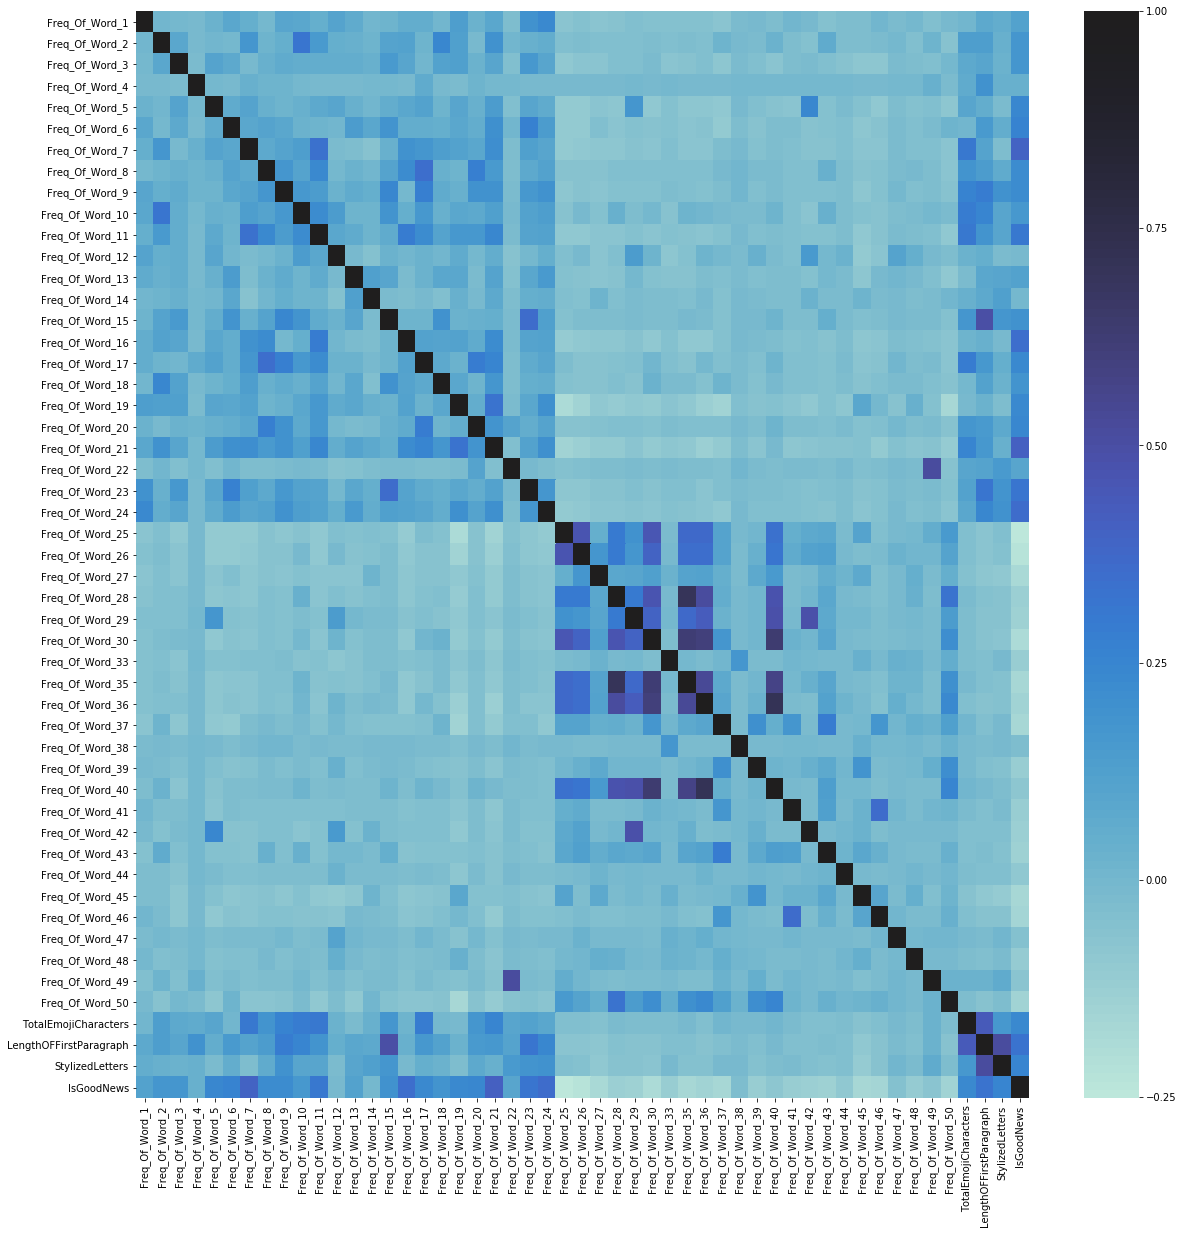

In [139]:
df_2_corr = df_2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_2_corr, center=1)